In [864]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

открываем датасет:

In [865]:
df=pd.read_csv("train.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


дропаем сразу дату и выделяем время:

In [866]:
df['datetime']=pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['year']=df['datetime'].dt.year
df['month']=df['datetime'].dt.month
df.drop(['datetime'],axis=1,inplace=True)

Смотрим что как и с чем связано:

In [867]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.006546,-0.004797,0.971524
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.000354,0.012021,0.001731
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.002780,-0.002482,-0.003394
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.022740,-0.012548,0.012144
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.145430,0.061226,0.257589
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.140343,0.058540,0.264173
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.278011,-0.078606,0.204537
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.146631,-0.015221,-0.150192
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.302045,0.145241,0.092722
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.380540,0.264265,0.169451


Циферки-просто,немного придадим стиля,визуализируем:

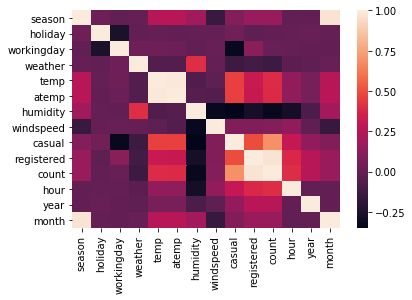

In [868]:
sns.heatmap(df.corr())

Дропаем 'registered' и 'casual' потому что коррелируют сильно с count,а 'atemp' потому что с 'temp': 

In [869]:
df.drop(['registered','casual','atemp'],axis=True,inplace=True)

еще разок смотрим:

In [870]:
df.corr()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,hour,year,month
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.190610,-0.147121,0.163439,-0.006546,-0.004797,0.971524
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,0.001929,0.008409,-0.005393,-0.000354,0.012021,0.001731
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,-0.010880,0.013373,0.011594,0.002780,-0.002482,-0.003394
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,0.406244,0.007261,-0.128655,-0.022740,-0.012548,0.012144
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,-0.064949,-0.017852,0.394454,0.145430,0.061226,0.257589
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,1.000000,-0.318607,-0.317371,-0.278011,-0.078606,0.204537
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.318607,1.000000,0.101369,0.146631,-0.015221,-0.150192
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,-0.317371,0.101369,1.000000,0.400601,0.260403,0.166862
hour,-0.006546,-0.000354,0.002780,-0.022740,0.145430,-0.278011,0.146631,0.400601,1.000000,-0.004234,-0.006818
year,-0.004797,0.012021,-0.002482,-0.012548,0.061226,-0.078606,-0.015221,0.260403,-0.004234,1.000000,-0.004932


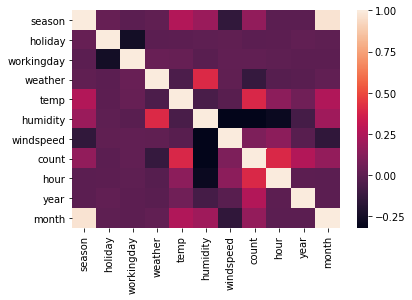

In [871]:
sns.heatmap(df.corr())

**Теперь можно собрать регрессию с категориальными признаками:**

In [872]:
Y1=df['count']
X1=df.drop(['count'],axis=1)
Xtrain1,Xtest1,Ytrain1,Ytest1=train_test_split(X1.values,Y1.values,test_size=0.2)

In [873]:
linreg=LinearRegression(n_jobs=-1)

In [874]:
linreg.fit(Xtrain1,Ytrain1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [875]:
MSE_WITH_CATEGORICAL_SIGNS=mean_squared_error(Ytest1,linreg.predict(Xtest1))

**Убираем категориальные признаки:**

In [876]:
df_new=df.drop(['season','holiday','workingday','weather'],axis=1)
df_new.head()

,temp,humidity,windspeed,count,hour,year,month
0,9.84,81,0.0,16,0,2011,1
1,9.02,80,0.0,40,1,2011,1
2,9.02,80,0.0,32,2,2011,1
3,9.84,75,0.0,13,3,2011,1
4,9.84,75,0.0,1,4,2011,1


Собираем без категориальных признаков:

In [877]:
Y2=df_new['count']
X2=df_new.drop(['count'],axis=1)
Xtrain2,Xtest2,Ytrain2,Ytest2=train_test_split(X2.values,Y2.values,test_size=0.2)

In [878]:
linreg.fit(Xtrain2,Ytrain2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [879]:
MSE_WITHOUT_CATEGORICAL_SIGNS=mean_squared_error(Ytest2,linreg.predict(Xtest2))
MSE_WITHOUT_CATEGORICAL_SIGNS

20586.421924016657

**собираем с one-hot-encoder:**

Что за фигня вообще?

"Предположим, что некоторый признак может принимать 10 разных значений. В этом случае One Hot Encoding подразумевает создание 10 признаков, все из которых равны нулю за исключением одного. На позицию, соответствующую численному значению признака мы помещаем 1.По умолчанию OneHotEncoder преобразует данные в разреженную матрицу, чтобы не расходовать память на хранение многочисленных нулей."

прикона,пробуем,а как?

1) Dummy Variables-должен автоматом создать для категориальных признаков новые фичи

2) One Hot Encoding-ну собс-но вручную и думая,кто из твоих признаков мб категориальным

In [880]:
print("original features:\n",list(df.columns),'\n')
data_dumies=pd.get_dummies(df)
print('features after OHE:\n',list(data_dumies.columns))

original features:
 ['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'count', 'hour', 'year', 'month'] 

features after OHE:
 ['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'count', 'hour', 'year', 'month']


Ничего не понменялось,хз,тогда в ручную:

In [881]:
onehot_encoder = OneHotEncoder(sparse=False)

In [882]:
Y3=df['count']
X3=df.drop(['count'],axis=1)
df.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,hour,year,month
0,1,0,0,1,9.84,81,0.0,16,0,2011,1
1,1,0,0,1,9.02,80,0.0,40,1,2011,1
2,1,0,0,1,9.02,80,0.0,32,2,2011,1
3,1,0,0,1,9.84,75,0.0,13,3,2011,1
4,1,0,0,1,9.84,75,0.0,1,4,2011,1


По идее нуждающиеся в OHE признаки тут: month,weather,hour,year:

In [883]:
categorical_columns=['weather','hour', 'year', 'month']
categorical_columns

['weather', 'hour', 'year', 'month']

In [884]:
encoded_categorical_columns = pd.DataFrame(onehot_encoder.fit_transform(df[categorical_columns]))
encoded_categorical_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [885]:
x=pd.concat([X3.drop(categorical_columns,axis=1),encoded_categorical_columns],axis=1)
x.head()

,season,holiday,workingday,temp,humidity,windspeed,0,1,2,3,...,32,33,34,35,36,37,38,39,40,41
0,1,0,0,9.84,81,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,9.02,80,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,9.02,80,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,9.84,75,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,9.84,75,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [886]:
Xtrain3,Xtest3,Ytrain3,Ytest3=train_test_split(encoded_categorical_columns.values,Y3.values,test_size=0.2)

In [887]:
linreg.fit(Xtrain3,Ytrain3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [888]:
MSE_WITH_OHE=mean_squared_error(Ytest3,linreg.predict(Xtest3))

In [889]:
MSE_WITH_OHE

10966.128123525965

Сравним полученные MSE:

In [903]:
print('\n Difference in MSE linreg with OHE and without linreg Categorical signs',MSE_WITH_OHE-MSE_WITHOUT_CATEGORICAL_SIGNS)


 Difference in MSE linreg with OHE and without linreg Categorical signs -9620.293800490692


In [902]:
print('\n Difference in MSE linreg with OHE and with linreg Categorical signs',MSE_WITH_OHE-MSE_WITH_CATEGORICAL_SIGNS)


 Difference in MSE linreg with OHE and with linreg Categorical signs -9720.993070635812


Нет,ну как бы OHE лучше,да,но теперь попробуем скинуть лишние параметры и еще разок:

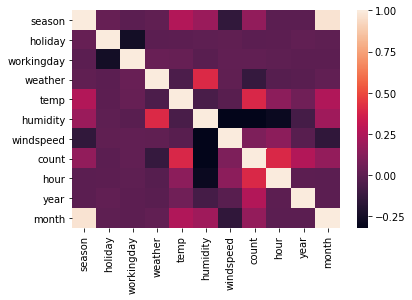

In [892]:
sns.heatmap(df.corr())

Weather-humidity,month-season дропаем половину

In [893]:
df.drop(['weather','season'],axis=1,inplace=True)

In [894]:
df.head()

,holiday,workingday,temp,humidity,windspeed,count,hour,year,month
0,0,0,9.84,81,0.0,16,0,2011,1
1,0,0,9.02,80,0.0,40,1,2011,1
2,0,0,9.02,80,0.0,32,2,2011,1
3,0,0,9.84,75,0.0,13,3,2011,1
4,0,0,9.84,75,0.0,1,4,2011,1


не знаю,чтобы улучшить рез-т можно попробовать заскейлить:

In [895]:
scaler = StandardScaler()

In [896]:
scaler.fit_transform(df['temp'].values.reshape(-1, 1))
df['temp'] = scaler.transform(df['temp'].values.reshape(-1, 1))

In [897]:
Y5=df['count']
X5=df.drop(['count'],axis=1)
Xtrain5,Xtest5,Ytrain5,Ytest5=train_test_split(X5.values,Y5.values,test_size=0.2)

In [898]:
linreg.fit(Xtrain5,Ytrain5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [899]:
MSE_FIXED_FATURES=mean_squared_error(Ytest5,linreg.predict(Xtest5))

In [901]:
print('\n Difference in MSE linreg with OHE and with fixed linreg Categorical signs',MSE_WITH_OHE-MSE_FIXED_FATURES)


 Difference in MSE linreg with OHE and with fixed linreg Categorical signs -8542.711543971853


Ну получше стало,да,чутка лучше